In [878]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import re 
import seaborn as sns
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [879]:
#1 checking for missing value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [880]:
# replacing missing values with the median
df['Age']=df['Age'].fillna(df['Age'].median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [881]:
# Droping columns with irelevant data
df.drop(columns=["Cabin", "Ticket", "PassengerId"], inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [882]:
# creating a new column called familysize to replace SibSp Parch
df['familysize']=df['SibSp']+df['Parch']+1
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,familysize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [883]:
# droping Parch and  SibSp replaced by famillysize
df.drop(columns=["SibSp","Parch"], inplace=True)
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,1


In [884]:
# CHECKING FOR DUPLICATE 
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head(10))

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, Fare, Embarked, familysize]
Index: []


<Axes: >

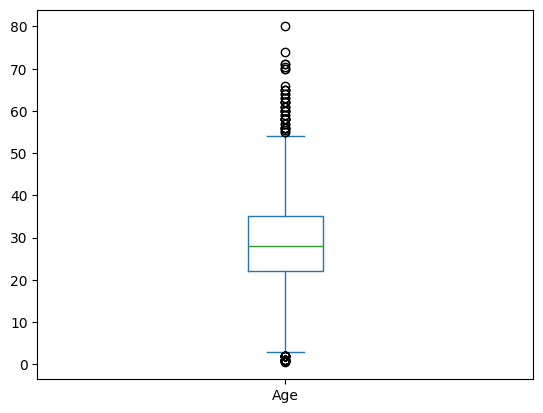

In [885]:
# Box plot for age column to check for outliers inthe column
df['Age'].plot.box()

<Axes: >

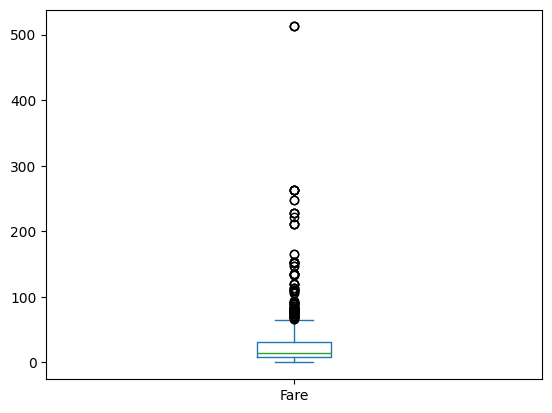

In [886]:
# Box plot for age column to check for outliers inthe column
df['Fare'].plot.box()

Text(0, 0.5, 'Fare')

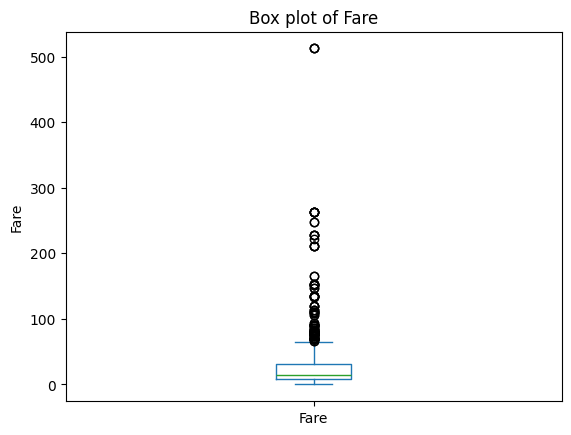

In [887]:
# Box plot for the fare column tocheck for outliers in the column
df['Fare'].plot.box()
plt.title('Box plot of Fare')
plt.ylabel('Fare')

In [888]:

    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,1,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,1,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500,S,4,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,1,Mr


<function matplotlib.pyplot.show(close=None, block=None)>

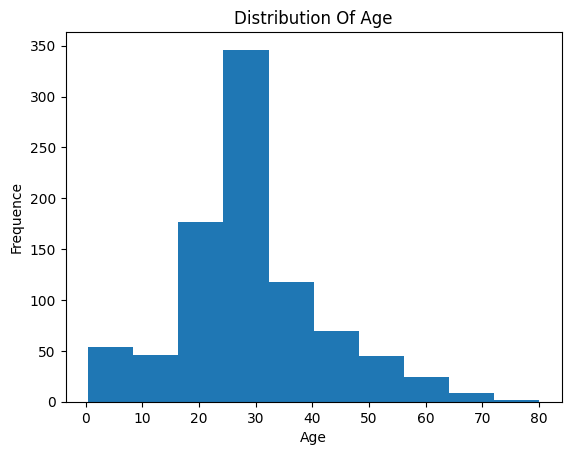

In [889]:
# fiding the distribution of the Age column
df['Age'].plot.hist()
plt.title('Distribution Of Age')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show

In [890]:
# calculating survival rate by passenger class
survival_rate=df.groupby('Pclass')['Survived'].mean()
survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0.5, 1.0, 'survival_rate againts Passenger_class')

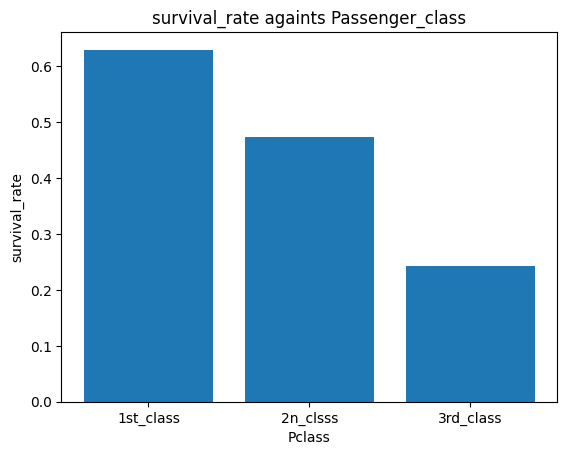

In [891]:
# visualizing survival rate by  passenger class using bar plot
plt.bar(survival_rate.index,survival_rate.values)
plt.xticks(survival_rate.index, labels=('1st_class','2n_clsss', '3rd_class'))
plt.ylabel('survival_rate')
plt.xlabel('Pclass')
plt.title('survival_rate againts Passenger_class')

In [892]:
# creating a new column called age group to store age groups of passengers
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize,Title,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Mr,21-40
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Mrs,21-40
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Miss,21-40
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Mrs,21-40
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Mr,21-40
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,1,Rev,21-40
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,1,Miss,0-20
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500,S,4,Miss,21-40
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,1,Mr,21-40


In [893]:
# calculating survival rate by agegroup
survival_rate=df.groupby('AgeGroup')['Survived'].mean()
survival_rate

C:\Users\WIYLANYUY BLAISE\AppData\Local\Temp\ipykernel_14176\465148736.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate=df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
0-20      0.458101
21-40     0.364769
41-60     0.390625
61-80     0.227273
81-100         NaN
Name: Survived, dtype: float64

Text(0.5, 0, 'AgeGroup')

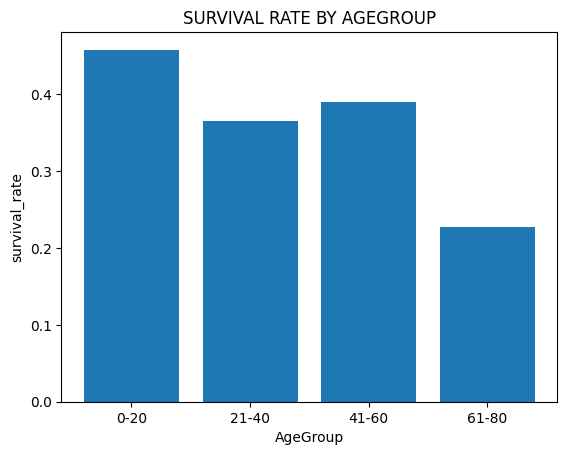

In [894]:
# ploting survival rate by agegroup using bar plot
plt.bar(survival_rate.index, survival_rate.values)
plt.title('SURVIVAL RATE BY AGEGROUP')
plt.ylabel('survival_rate')
plt.xlabel('AgeGroup')

In [895]:
# Calculating survival rate by sex
survival_rate=df.groupby('Sex')['Survived'].mean()
survival_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

([<matplotlib.axis.XTick at 0x12dd8910b10>,
 [Text(0.0, 0, 'FEMALE'), Text(1.0, 0, 'MALE')])

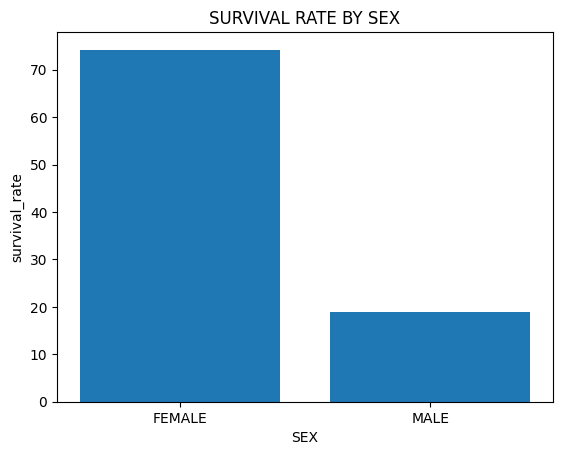

In [896]:
# plotinh survival rate by sex
plt.bar(survival_rate.index, survival_rate.values*100)
plt.title('SURVIVAL RATE BY SEX')
plt.ylabel('survival_rate')
plt.xlabel('SEX')
plt.xticks(survival_rate.index, labels=('FEMALE', 'MALE'))


In [897]:
# calculating survival rate by Title
survival_rate=df.groupby('Title')['Survived'].mean()

Text(0.5, 0, 'TITLES')

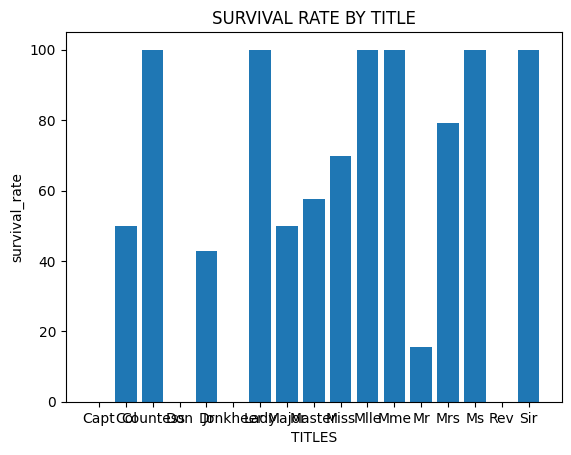

In [898]:
# ploting survival rate by title
plt.bar(survival_rate.index, survival_rate.values*100)
plt.title('SURVIVAL RATE BY TITLE')
plt.ylabel('survival_rate')
plt.xlabel('TITLES')

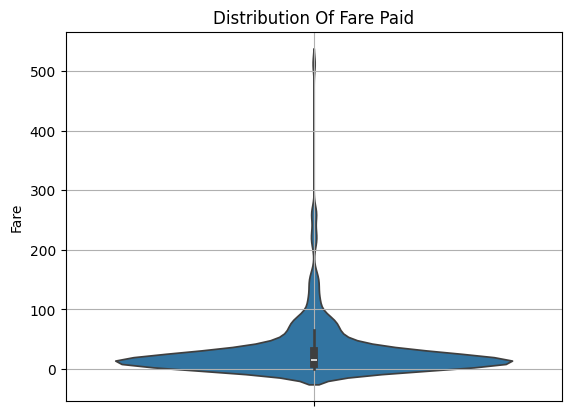

In [899]:
# Distribution of fare paid using a violin plot
sns.violinplot(df['Fare'])
plt.title('Distribution Of Fare Paid')
plt.grid(True)

In [900]:
# overall survival rate
overall_survival_rate = df['Survived'].mean()*100
overall_survival_rate


38.38383838383838

In [901]:

# Survival rate by Sex
survivalrate_bysex = df.groupby('Sex')['Survived'].mean()*100
survivalrate_bysex

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

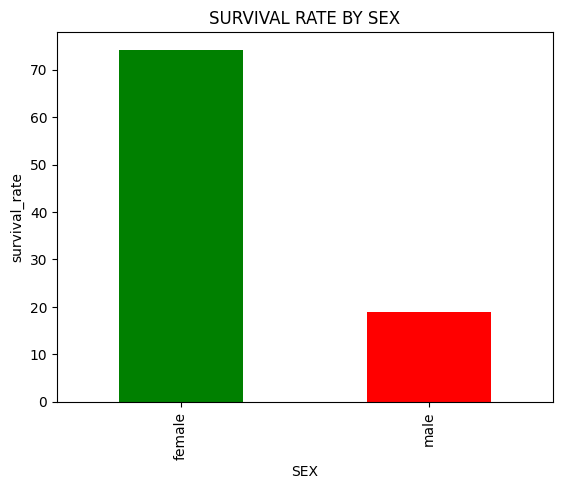

In [902]:
# ploting survival rate by sex using bar plot
survivalrate_bysex.plot(kind='bar', color=['green', 'red'])
plt.title('SURVIVAL RATE BY SEX')
plt.ylabel('survival_rate')
plt.xlabel('SEX')
plt.show

In [903]:
# filling missing values in the embarked colun with the mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize,Title,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Mr,21-40
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Mrs,21-40
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Miss,21-40
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Mrs,21-40
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Mr,21-40
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,1,Rev,21-40
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,1,Miss,0-20
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500,S,4,Miss,21-40
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,1,Mr,21-40


In [904]:
# calculating survival rate by family size 
survivalrate = df.groupby('familysize')['Survived'].mean()*100
survivalrate

familysize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

Text(0.5, 0, 'FAMILY SIZE')

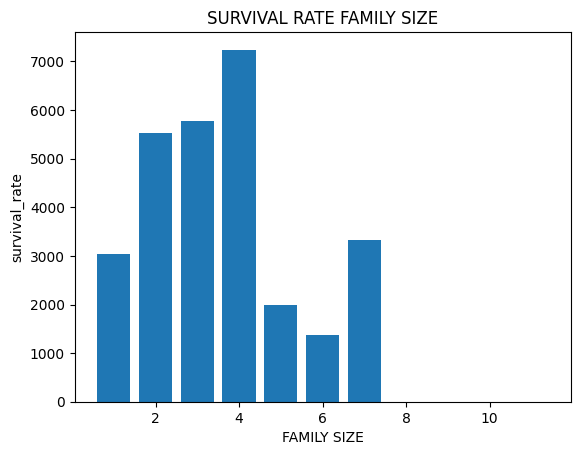

In [905]:
# plotinh survival rate by family size using bar plot
plt.bar(survivalrate.index, survivalrate.values*100)
plt.title('SURVIVAL RATE FAMILY SIZE')
plt.ylabel('survival_rate')
plt.xlabel('FAMILY SIZE')

In [906]:
# checking how embarkation affected the survivival rate of passengers.
survivalrate = df.groupby('Embarked')['Survived'].mean()*100
survivalrate 

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

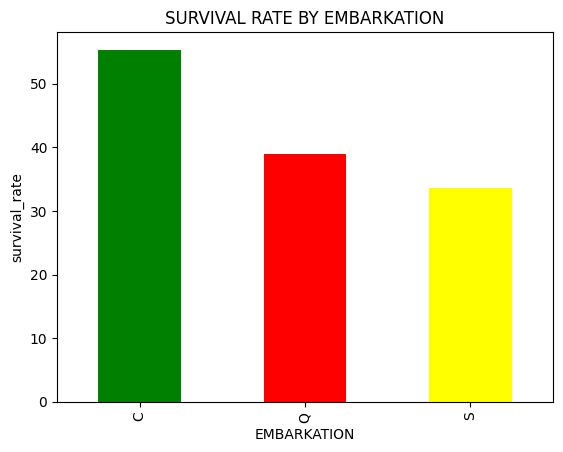

In [907]:
# checking how survival rate of passengers was affected by embarkation
survivalrate.plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title('SURVIVAL RATE BY EMBARKATION')
plt.ylabel('survival_rate')
plt.xlabel('EMBARKATION')
plt.show

In [908]:
# coverting categorical data in the sex column to numerical to calculate correlation
df['Sex']=df['Sex'].map({'male':0, 'female':1})

In [909]:

# changing datatype of sex column to int
df['Sex'].astype(int)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int32

In [910]:
# making the embarkation column numerical to be able to calculate the correlation
df['Embarked']= df['Embarked'].map({'S':1, 'Q':2, 'C':3})


In [911]:
#changing the datatype of the embarkation column
df['Embarked'].astype(float)

0      1.0
1      3.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    3.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

In [912]:
# creating a new dataframe to store numerical columns
md=df.drop(columns=['Name', 'Title', 'AgeGroup'])
md

,Survived,Pclass,Sex,Age,Fare,Embarked,familysize
0,0,3,0,22.0,7.2500,1.0,2
1,1,1,1,38.0,71.2833,3.0,2
2,1,3,1,26.0,7.9250,1.0,1
3,1,1,1,35.0,53.1000,1.0,2
4,0,3,0,35.0,8.0500,1.0,1
...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,1.0,1
887,1,1,1,19.0,30.0000,1.0,1
888,0,3,1,28.0,23.4500,1.0,4
889,1,1,0,26.0,30.0000,3.0,1


In [913]:
# calculating correlation between the various numerical columns
correlation=md.corr()

<Axes: >

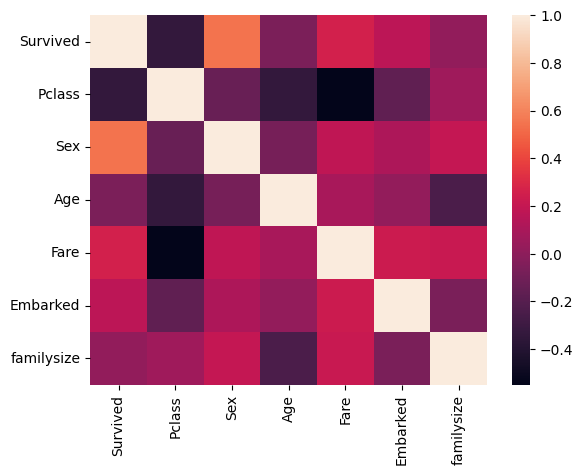

In [914]:
# Visualizing the corelation between numerical columns using a heatmap
sns.heatmap(correlation)

In [915]:
# Handling cathegorical data in the title column using onehotencoding
# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
one_hot_encoded = pd.get_dummies(df['Sex']).astype(int)
print("Original DataFrame:")
df
print("\nOne-Hot Encoded DataFrame:")
df_encoded

Original DataFrame:

One-Hot Encoded DataFrame:


,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize,Title,AgeGroup,1.0,2.0,3.0
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,1.0,2,Mr,21-40,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,3.0,2,Mrs,21-40,0,0,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,1.0,1,Miss,21-40,1,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,1.0,2,Mrs,21-40,1,0,0
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,1.0,1,Mr,21-40,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,13.0000,1.0,1,Rev,21-40,1,0,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,30.0000,1.0,1,Miss,0-20,1,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,23.4500,1.0,4,Miss,21-40,1,0,0
889,1,1,"Behr, Mr. Karl Howell",0,26.0,30.0000,3.0,1,Mr,21-40,0,0,1
